In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('FinalData.xlsx', index_col=0, sheet_name='Sheet1')
df=df[['user', 'role', 'Technical skill']]
df['role'] = df['role'].replace({'Mentor, Mentee': 'Mentor', 'Mentee, Mentor': 'Mentee'})

In [4]:
techskills = ['AI',
             'Back End',
             'Business Analysis',
             'Computer Networking',
             'Data analytics',
             'Database Management',
             'Digital Marketing',
             'Finance',
             'Front End',
             'Full Stack',
             'Sales and Marketing',
             'SEO',
             'Software Development',
             'Supply Chain',
            'Other']

In [5]:
df_clean = df[df['Technical skill'].notnull()]

In [6]:
for skill in techskills:
    df_clean[skill] = [True if skill in skills else False for skills in df_clean['Technical skill']]
    
df_mod = df_clean.pivot_table(index = 'role', values = techskills, aggfunc = 'sum')
df_mod = df_mod[techskills]


<ipython-input-6-6c7019e42519>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[skill] = [True if skill in skills else False for skills in df_clean['Technical skill']]


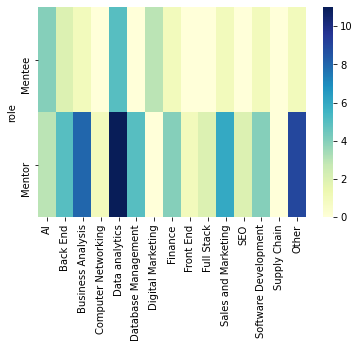

In [26]:
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plot = sns.heatmap(data = df_mod, cmap="YlGnBu")
plt.show()
plot.figure.savefig("heatmap.jpeg", dpi = 800, bbox_inches = 'tight')

In [8]:
display(df_mod)

,AI,Back End,Business Analysis,Computer Networking,Data analytics,Database Management,Digital Marketing,Finance,Front End,Full Stack,Sales and Marketing,SEO,Software Development,Supply Chain,Other
role,,,,,,,,,,,,,,,
Mentee,4,2,1,0,5,0,3,1,0,0,1,0,1,0,1
Mentor,3,5,8,1,11,5,0,4,1,2,6,2,4,0,9


In [9]:
df_mod.to_csv("DataAnalyze", index = True)

<Figure size 432x288 with 0 Axes>